In [39]:
%pylab inline

import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_many_opt/'

Populating the interactive namespace from numpy and matplotlib


In [40]:
# PLot validation of each period (not restricting to a single optimal allele) 
# with error bars showing +/- 1 std away from the mean 

def main():
    
    means = [10**-5, 10**-4, 10**-3, 10**-2]
    pers = [2,3,4]
    folder = 't23'
    fig_num = 0
    
    for per in pers:
        list_of_het_mean = []
        errors = []
        legend_labels = []

        for mean in means:
           
            for j in range(0,3):

                file_list = glob.glob('./results/validation_multiple/%s/per_%d_*_%.5f.txt'%(folder, per,mean)) # narrow_prior 
                file_list.sort()
                filename = file_list[j]
                
                allele_freqs_file = open(filename, 'r')
                lines = allele_freqs_file.readlines()

                line = lines[7]       
                info = line.strip().split(': ')
                list_of_means = info[1]
                list_of_means = list(list_of_means.split(','))
                list_of_means = list(map(float, list_of_means)) 
    
                list_of_het_mean.append(np.mean(list_of_means))
                errors.append(np.std(list_of_means))
                line = lines[1]
                info = line.strip().split(' ')
               
                k = float(info[7])
                theta = float(info[10])
                
                legend_labels.append('(%.1E,%.1E)'%(k,theta))
                
               
            
        fig_num = fig_num + 1
        #plt.figure(fig_num, figsize=(12, 6))
        fig, ax = plt.subplots(figsize=(12, 6))
        y_pos = np.arange(len(legend_labels))

        plt.errorbar(y_pos[0:3], list_of_het_mean[0:3], yerr=errors[0:3], marker = 'o', ls = '--', c='red') 
        plt.errorbar(y_pos[3:6], list_of_het_mean[3:6], yerr=errors[3:6], marker = 'o', ls = '--', c='red') 
        plt.errorbar(y_pos[6:9], list_of_het_mean[6:9], yerr=errors[6:9], marker = 'o', ls = '--', c='red') 
        plt.errorbar(y_pos[9:12], list_of_het_mean[9:12], yerr=errors[9:112], marker = 'o', ls = '--', c='red') 
        plt.xticks(y_pos[0:12], legend_labels[0:12], rotation = 35) 
        #plt.yscale('log')
        plt.ylabel("Estimated s")
        plt.axvline(x=2.5, linestyle = '--')
        plt.axvline(x=5.5, linestyle = '--')
        plt.axvline(x=8.5, linestyle = '--')
        plt.text(0.1,0,r'$s=10^{-5}$',transform=ax.transAxes)
        plt.text(0.35,0,r'$s=10^{-4}$',transform=ax.transAxes)
        plt.text(0.6,0,r'$s=10^{-3}$',transform=ax.transAxes)
        plt.text(0.85,0,r'$s=10^{-2}$',transform=ax.transAxes)
        #plt.ylim(10**-6, 10**-1)
        plt.title('Joint method validation: Period %d\nMean +/- 1 st dev of 30 median estimates'%(per))
        #plt.savefig(PLOTDIR + '%s/per_%d.pdf'%(folder,per),bbox_inches='tight')
        plt.show()

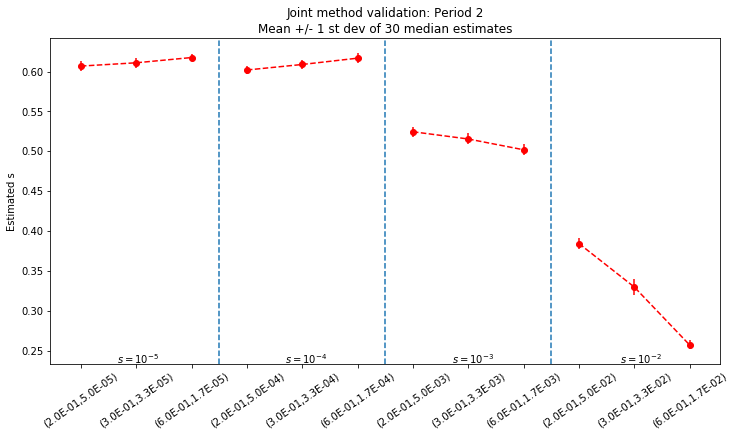

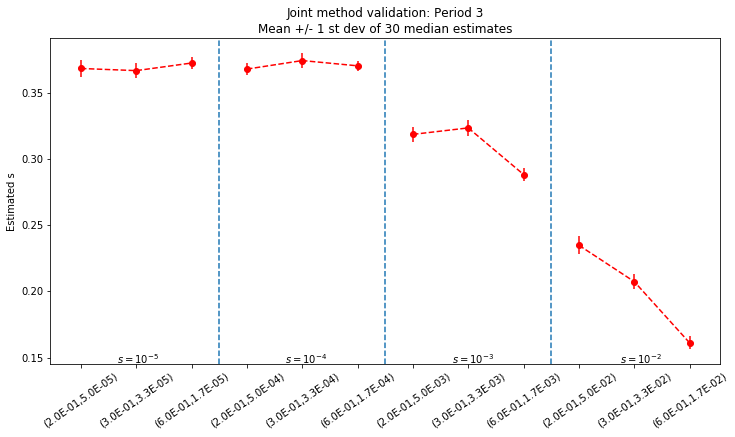

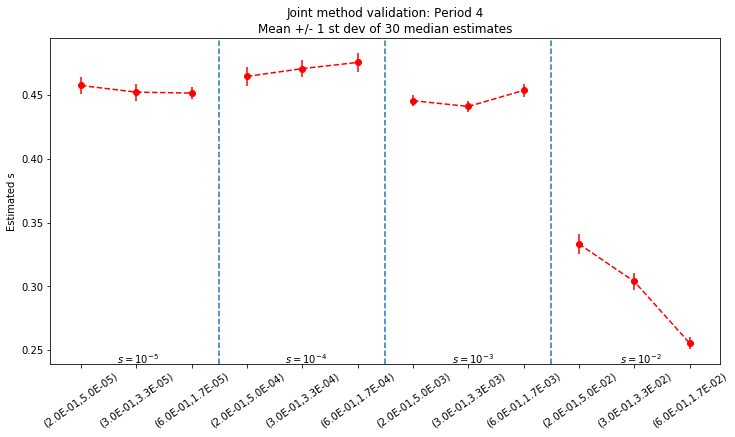

CPU times: user 952 ms, sys: 38 ms, total: 990 ms
Wall time: 988 ms


In [41]:
%%time
if __name__ == '__main__':
    main()